# Airfare EDA with Census Income

This notebook would showcase how we use the functions to extract income related insights from the USDOT airfare dataset.

In [1]:
#@title Google Collab only
import sys
sys.path.insert(0,'/content')

## Importing dependency

In [2]:
import coupon
import other
import ticket
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset
Note that in order for the below code to run, one must import a year, quarter matching coupon and ticket dataset.

The dataset could be download on the link below:
[Link to USDOT](https://www.transtats.bts.gov/tables.asp?QO_VQ=EFI&QO_anzr=Nv4yv0r)

For demonstration purpose, we would be using the Q1 2019 data.
Due to the large size of the dataset, it is recommended to do by quarter analysis, rather than an entire year (with the exception of 2020, as it has an unusually small amount of data with obvious reasons)

In [3]:
coupon_df = pd.read_csv("/content/Origin_and_Destination_Survey_DB1BCoupon_2019_1.csv")
ticket_df = pd.read_csv("/content/Origin_and_Destination_Survey_DB1BTicket_2019_1.csv")

## Combining dataset

In this report, we would use the combined dataset.

In [4]:
combined = other.gen_ticket_coupon(ticket_df, coupon_df)

The main reason for grabbing the combine dataset is that only the coupon dataset has the destination information, and only the ticket has the pricing data.

In [5]:
combined.head()

,ItinID,Coupons_x,Year,Quarter,Origin,OriginCityMarketID,OriginState,RoundTrip,OnLine,DollarCred,...,BulkFare,MilesFlown,ItinGeoType,SeqNum,Coupons_y,DestCityMarketID,Dest,DestState,CouponGeoType,FareClass
0,2019174441,1,2019,1,MCI,33198,MO,0.0,1.0,1,...,0.0,1107.0,2,1,1,31703,LGA,NY,2,X
1,2019179426,1,2019,1,MSP,31650,MN,0.0,1.0,1,...,0.0,1008.0,2,1,1,31703,EWR,NJ,2,X
2,2019181148,1,2019,1,MSP,31650,MN,0.0,1.0,1,...,0.0,448.0,2,1,1,31123,STL,MO,2,X
3,20191106757,1,2019,1,TYS,35412,TN,0.0,1.0,1,...,0.0,648.0,2,1,1,31703,LGA,NY,2,X
4,20191126267,1,2019,1,ATL,30397,GA,0.0,1.0,1,...,0.0,731.0,2,1,1,30194,DFW,TX,2,X


The resulting dataset should have 24 columns

## Analyzing `ItinFare` and `FarePerMile` with Coupon variables

As title

In [6]:
combined.corr()["ItinFare"].sort_values()

DollarCred           -0.166745
ItinGeoType          -0.085415
OnLine               -0.067707
Passengers           -0.065896
CouponGeoType        -0.046258
ItinID               -0.031006
BulkFare             -0.012106
DestCityMarketID     -0.010215
OriginCityMarketID   -0.008853
Coupons_x             0.167334
SeqNum                0.167334
Coupons_y             0.167334
RoundTrip             0.169407
MilesFlown            0.225840
FarePerMile           0.682151
ItinFare              1.000000
Year                       NaN
Quarter                    NaN
Name: ItinFare, dtype: float64

In [7]:
combined.corr()["FarePerMile"].sort_values()

DollarCred           -0.251185
MilesFlown           -0.182060
Coupons_x            -0.090183
SeqNum               -0.090183
Coupons_y            -0.090183
RoundTrip            -0.032344
Passengers           -0.018761
OriginCityMarketID   -0.018045
ItinID               -0.015997
DestCityMarketID     -0.012876
BulkFare             -0.006634
OnLine                0.003691
CouponGeoType         0.026252
ItinGeoType           0.045943
ItinFare              0.682151
FarePerMile           1.000000
Year                       NaN
Quarter                    NaN
Name: FarePerMile, dtype: float64

There is no suprise about the `ItinFare` has a such a high correlation with distance. However, it is also surprising to see the huge correlation with distance to `FarePerMile`

This showcase the common sense that fligts with longer distance in general is a better bang for your buck

## Better dependent variable?

So, let's see which variable is better to be a dependent variable for our modeling a bit later

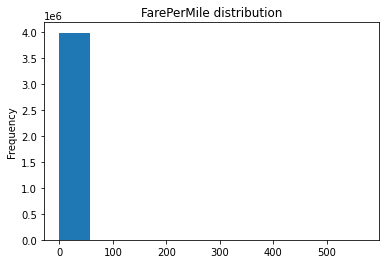

In [8]:
combined["FarePerMile"].plot(kind="hist", title="FarePerMile distribution")

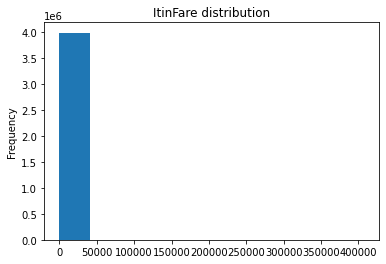

In [9]:
combined["ItinFare"].plot(kind="hist", title="ItinFare distribution")

We could see there is a huge spread of both variables due to a small amount of outliers

In [10]:
print("FPM max value: ", combined["FarePerMile"].max(), "FPM 99th-quatile: ", combined["FarePerMile"].quantile(.99))

FPM max value:  569.2157 FPM 99th-quatile:  1.3363


In [11]:
print("ItinF max value: ", combined["ItinFare"].max(), "ItinF 99th-quatile: ", combined["ItinFare"].quantile(.99))

ItinF max value:  407200.0 ItinF 99th-quatile:  1535.0


The numbers confirmed the plots itself, let's see how we should filter the combined dataset

Let's start with filtering out the upper 1% quantile of `ItinFare` (ItinF)  

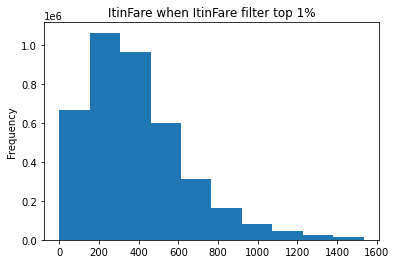

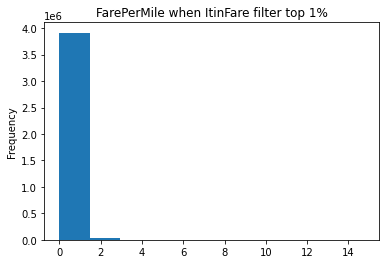

In [12]:
combined["ItinFare"][combined["ItinFare"] < combined["ItinFare"].quantile(.99)].plot(kind="hist", title="ItinFare when ItinFare filter top 1%")
plt.show()
combined["FarePerMile"][combined["ItinFare"] < combined["ItinFare"].quantile(.99)].plot(kind="hist", title="FarePerMile when ItinFare filter top 1%")
plt.show()

We could see `ItinFare` is showing a standard unimodal distribution. However, we could also see the FPM is still having strong outliers.

Let's see would it be better to filter using `FarePerMiles` instead

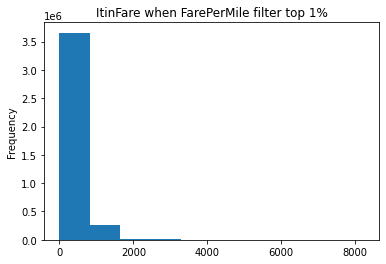

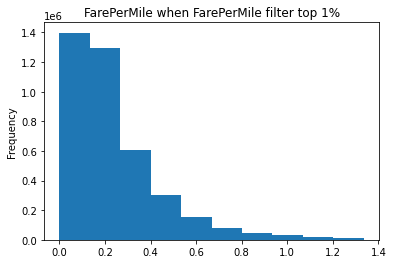

In [13]:
combined["ItinFare"][combined["FarePerMile"] < combined["FarePerMile"].quantile(.99)].plot(kind="hist", title="ItinFare when FarePerMile filter top 1%")
plt.show()
combined["FarePerMile"][combined["FarePerMile"] < combined["FarePerMile"].quantile(.99)].plot(kind="hist", title="FarePerMile when FarePerMile filter top 1%")
plt.show()

It's defintely showing some improvement. However, would it be better when both variables filter using that range?

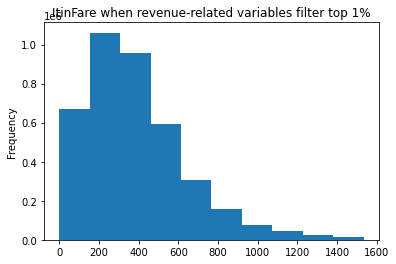

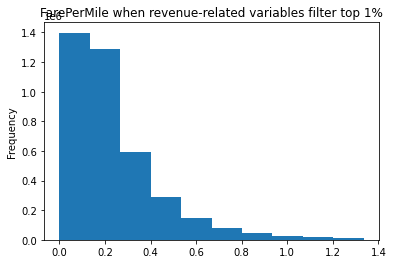

In [14]:
combined["ItinFare"][
    (combined["FarePerMile"] < combined["FarePerMile"].quantile(.99)) &
    (combined["ItinFare"] < combined["ItinFare"].quantile(.99))].plot(
        kind="hist", title="ItinFare when revenue-related variables filter top 1%")
plt.show()
combined["FarePerMile"][
    (combined["FarePerMile"] < combined["FarePerMile"].quantile(.99)) &
    (combined["ItinFare"] < combined["ItinFare"].quantile(.99))].plot(
        kind="hist", title="FarePerMile when revenue-related variables filter top 1%")
plt.show()

This confirmed it. Let's use the function to filter the variables.

In [15]:
combined_filtered_FPM = ticket.filter_ticket_df_outliers_FPM(combined)
filter_combined = ticket.filter_ticket_df_outliers_Itin(combined_filtered_FPM)

Though we could see above that both variable could be reliable dependent varibles, due to the fact that `FarePerMile` are easier to be compared than `ItinFare` which would be affected by more variables that we may not have the ability to access, we would be focus our effort below on `FarePerMile`.

## Census Income Data

By importing the census income data, we are able to grab more insight in regards to price discrimination towards protected groups. (i.e.: low income areas)

More specifically, our analysis uses the median household income in each metropolitan area defined by US Census bureau to find whether there is price discrimination towards low income areas. 

In [16]:
#@title Grabbing census data from path

# The below function should be given the census data from our source, the data has 
# the code (city_market_code) that was needed to match on the census
census_city_code = other.read_cen_data(".../census_city_code.csv")

If the files is successfully loaded, below code should show a histogram

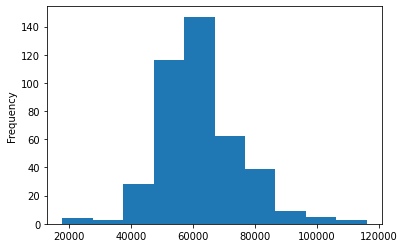

In [17]:
other.us_city_median_income_plot(census_city_code)

We could see in general, the US household median income has a normal distribution

## Insight from income-separted market areas dataset

Flights originate city areas that has median income in the bottom 25 percentile
Mean of FarePerMile :  0.23936070987060795
Mean of MilesFlown :  2116.0531853520506
Mean of Average Segments: 2.813219417048982
FarePerMile by carrier:


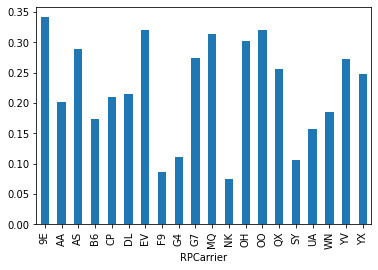

FarePerMile Distribution:


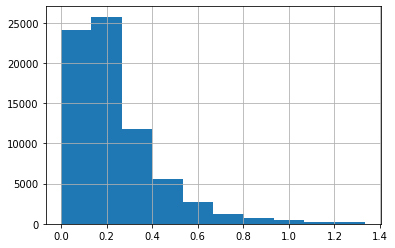

Flights destination is city areas that has median income in the bottom 25 percentile
Mean of FarePerMile :  0.23919346362525926
Mean of MilesFlown :  2114.450870664432
Mean of Average Segments: 2.8420163054285146
FarePerMile by carrier:


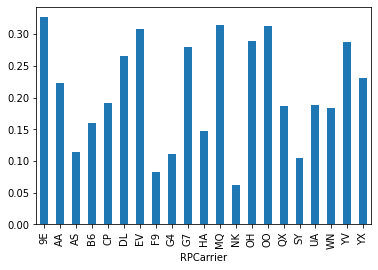

FarePerMile Distribution:


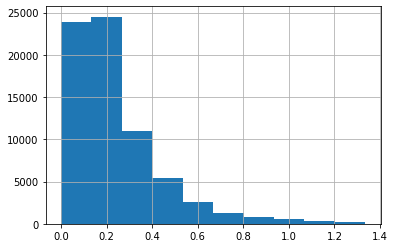

In [18]:
other.bottom_25_data(filter_combined, census_city_code)

Flights originate city areas that has median income in the upper 25 percentile
Mean of FarePerMile :  0.23895542954373056
Mean of MilesFlown :  2201.5014665655144
Mean of Average Segments: 2.4042288934648313
FarePerMile by carrier:


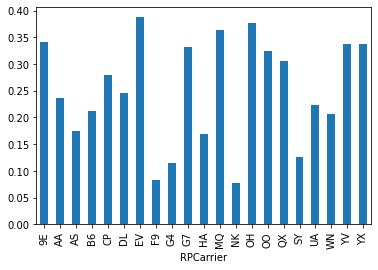

FarePerMile Distribution:


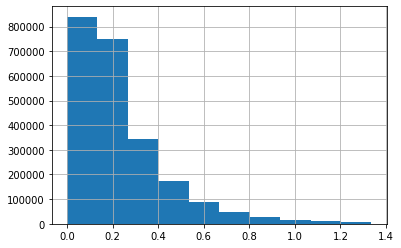

Flights destination is city areas that has median income in the upper 25 percentile
Mean of FarePerMile :  0.2388998360284507
Mean of MilesFlown :  2203.3459881959534
Mean of Average Segments: 2.4040134277414573
FarePerMile by carrier:


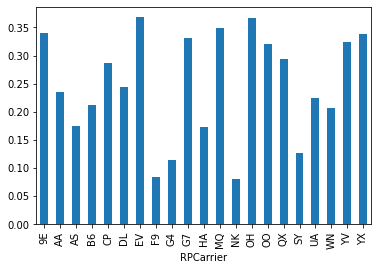

FarePerMile Distribution:


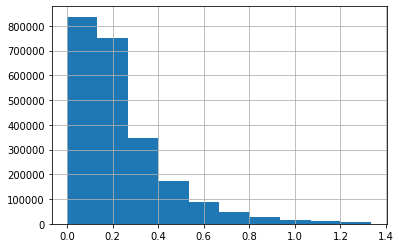

In [19]:
other.upper_25_data(filter_combined, census_city_code)

The above shows the average FPM for metropolitian area as:


*   Bottom 25%-tile as destination
*   Bottom 25%-tile as origin
*   Upper 25%-tile as destination
*   Upper 25%-tile as origin

We could see both metrics (as destination/as origin), the upper 25%-tile has a lower FPM despite averaging a shorter flight distance. From our previous analysis, we noticed the short distant flight has usually a higher fare. However, it is not the case here. It is also worth to mention that there is a slighly higher segment count in the bottom-tile.

We expect that if we just look at passengers that would only have one-segement on their ticket, we believe that there would be larger discrepency. However, it would be unfair to focus our reasearch on only one segment as most passengers buys a plane ticket mostly based on the origin and destination. Though segment count is a consideration, we believe it would make the most sense if we count as much ticket as possible.

It would be interesting to see how the bias would turn out in the model. 

Flights originate bottom 25 to upper 25
Mean of FarePerMile :  0.23389065524944155
Mean of MilesFlown :  1783.074034677162
Mean of Average Segments: 1.9072439102223169
FarePerMile by carrier:


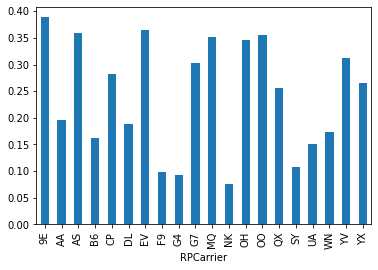

FarePerMile Distribution:


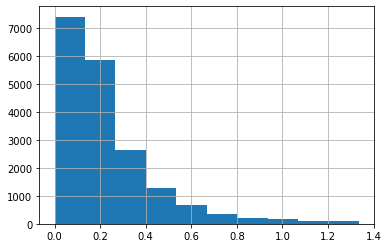

Flights originate upper 25 to bottom 25
Mean of FarePerMile :  0.2364195141377937
Mean of MilesFlown :  1722.3718495761507
Mean of Average Segments: 1.8839392387779486
FarePerMile by carrier:


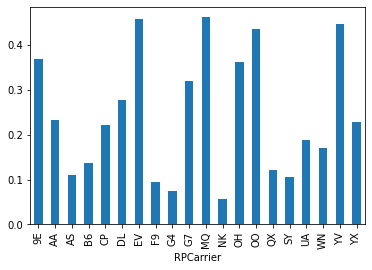

FarePerMile Distribution:


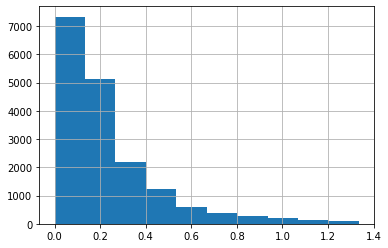

In [20]:
other.lower_and_upper_data(filter_combined, census_city_code)

The above shows flights orgin bottom --> upper and upper-->bottom.

From the data above, we did not see a large discrepency.

However, it is worthwhile to note that there is a huge decrease on the segment count.

Flights originate and destin for bottom 25
Mean of FarePerMile :  0.24124264877776083
Mean of MilesFlown :  2489.6033440056917
Mean of Average Segments: 3.592798698988667
FarePerMile by carrier:


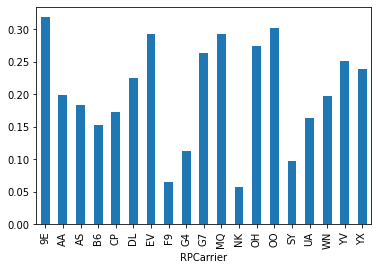

FarePerMile Distribution:


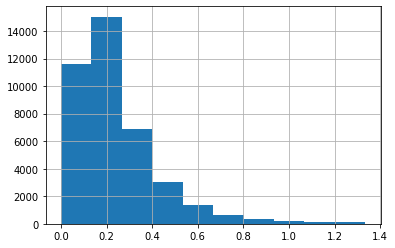

Flights originate and destin for upper 25
Mean of FarePerMile :  0.23766125380821113
Mean of MilesFlown :  2336.3721933224183
Mean of Average Segments: 2.5430540299682907
FarePerMile by carrier:


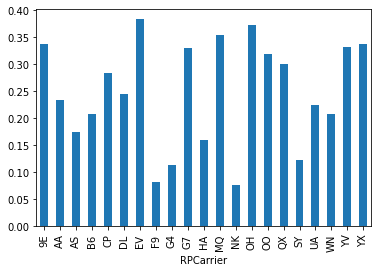

FarePerMile Distribution:


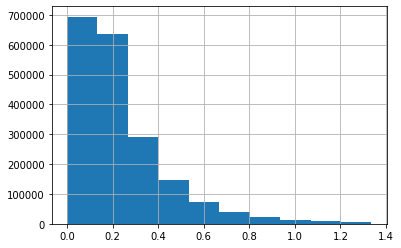

In [21]:
other.double_low_high(filter_combined, census_city_code)

The above shows flights from originate and destinate on the areas with the same income band.

There is a strong indication that flight originate on the lower median group has a much higher fare.